In [0]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/data/5/._5_12630_1577672001.5502248.png  
  inflating: data/5/5_13630_1577672002.4146838.png  
  inflating: __MACOSX/data/5/._5_13630_1577672002.4146838.png  
  inflating: data/5/5_13697_1577672002.4834926.png  
  inflating: __MACOSX/data/5/._5_13697_1577672002.4834926.png  
  inflating: data/5/5_12431_1577672001.370705.png  
  inflating: __MACOSX/data/5/._5_12431_1577672001.370705.png  
  inflating: data/5/5_13175_1577672002.0159798.png  
  inflating: __MACOSX/data/5/._5_13175_1577672002.0159798.png  
  inflating: data/5/5_13539_1577672002.3249161.png  
  inflating: __MACOSX/data/5/._5_13539_1577672002.3249161.png  
  inflating: data/5/5_12872_1577672001.7626584.png  
  inflating: __MACOSX/data/5/._5_12872_1577672001.7626584.png  
  inflating: data/5/5_13226_1577672002.0618577.png  
  inflating: __MACOSX/data/5/._5_13226_1577672002.0618577.png  
  inflating: data/5/5_13536_1577672002.3219247.png  
  inflating: __

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import pickle
import pandas as pd
import cv2
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.model_selection import train_test_split

%matplotlib inline

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
#importing the images

data = os.listdir('data')

X = [] #traffic sign images
Y = [] #label

count = 0
for subfolder in data:
  if subfolder != '.DS_Store':
    folder = os.listdir('data/' + str(count))
    for img in folder:
      image = cv2.imread('data/' + str(count) + '/' + img)
      X.append(image)
      Y.append(count)
    count += 1

X = np.array(X)
Y = np.array(Y)

In [0]:
#split data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

In [0]:
print("Data Shapes:        X             Y")
print("Train:      ", X_train.shape,Y_train.shape)
print("Val:        ", X_val.shape,Y_val.shape)
print("Test:       ", X_test.shape,Y_test.shape)

Data Shapes:        X             Y
Train:       (22271, 32, 32, 3) (22271,)
Val:         (5568, 32, 32, 3) (5568,)
Test:        (6960, 32, 32, 3) (6960,)


In [0]:
#label

labels = pd.read_csv('labels.csv')
print(labels)

    ClassId                                               Name
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

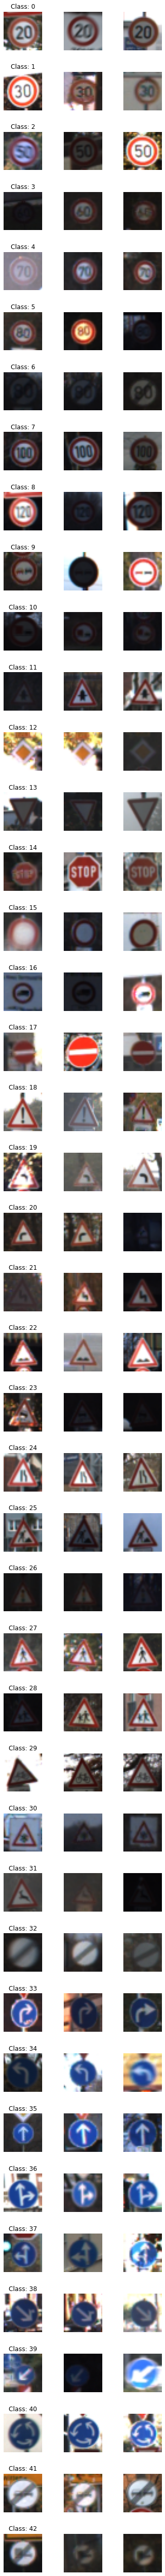

In [0]:
# display a few images for each classes

fig, axs = plt.subplots(nrows=43, ncols=3, figsize=(5,70))
fig.tight_layout()

for col in range(3):
    for row, item in labels.iterrows():
      selected_image = X_train[Y_train == row]
      axs[row][col].imshow(selected_image[random.randint(0,(len(selected_image) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[row][col].axis("off")
      if col == 0:
        axs[row][col].set_title("Class: " + str(row))


(32, 32, 3)
6


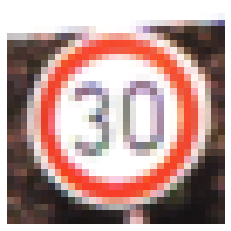

In [0]:
#pick a random image to process

plt.imshow(X_train[5678])
plt.axis("off")
print(X_train[30].shape)
print(Y_train[30])

(32, 32)


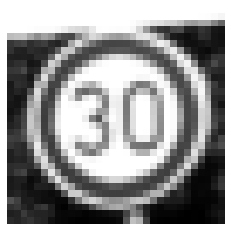

In [0]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(X_train[5678])
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis("off")
print(img.shape)

(32, 32)


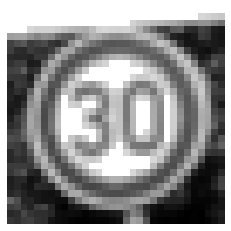

In [0]:
def equalizeHist(img):
    img = cv2.equalizeHist(img)
    return img

img = equalizeHist(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis("off")
print(img.shape)

In [0]:
def preprocess_image(img):
    img = grayscale(img)
    img = equalizeHist(img)
    img = img/255
    return img
   

In [0]:
#preprocess all images

X_train = np.array(list(map(preprocess_image, X_train)))
X_test = np.array(list(map(preprocess_image, X_test)))
X_val = np.array(list(map(preprocess_image, X_val)))

(22271, 32, 32)


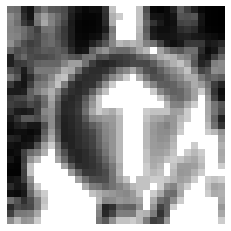

In [0]:
#pick a random image to check whether images have been processed correctly
#here image #5 was picked

plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
plt.axis('off')
print(X_train.shape)

In [0]:
#reshape data to have a depth of 1

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],X_val.shape[2], 1)

In [0]:
# one hot encoding

Y_train = to_categorical(Y_train, 43)
Y_test = to_categorical(Y_test, 43)
Y_val = to_categorical(Y_val, 43)

In [0]:
# transform the image for varieties

imageGen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
imageGen.fit(X_train)

In [0]:
#construct a model

def traffic_signs_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.5))

  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
model = traffic_signs_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 30)         

In [0]:
history = model.fit_generator(imageGen.flow(X_train, Y_train, batch_size=50),
                            steps_per_epoch=2000,
                            epochs=10,
                            validation_data=(X_val, Y_val), shuffle = 1)

Epoch 1/10
2000/2000 [==============================] - 61s 31ms/step - loss: 1.2355 - accuracy: 0.6370 - val_loss: 0.1047 - val_accuracy: 0.9727
Epoch 2/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.4140 - accuracy: 0.8706 - val_loss: 0.0666 - val_accuracy: 0.9790
Epoch 3/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.2905 - accuracy: 0.9091 - val_loss: 0.0474 - val_accuracy: 0.9856
Epoch 4/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.2296 - accuracy: 0.9287 - val_loss: 0.0457 - val_accuracy: 0.9847
Epoch 5/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.1991 - accuracy: 0.9386 - val_loss: 0.0289 - val_accuracy: 0.9923
Epoch 6/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.1745 - accuracy: 0.9458 - val_loss: 0.0233 - val_accuracy: 0.9941
Epoch 7/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.1605 - accuracy: 0.9511 - val_loss: 0.0224 -

Text(0.5, 0, 'epoch')

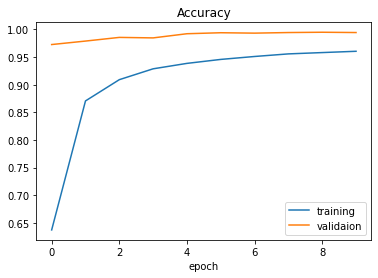

In [0]:
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validaion'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

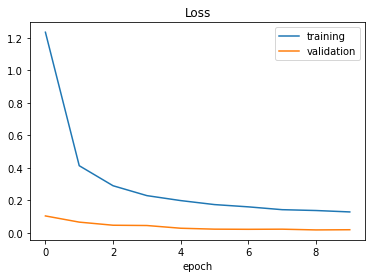

In [0]:
# plot loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')

In [0]:
# evaluate the model
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.018055995314102017
Test accuracy: 0.995258629322052


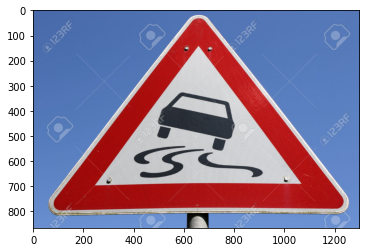

In [0]:
# test the model with images the model hasn't seen before

#CLASS 23
slippery_road = cv2.imread('slippery-road(23).jpg')
slippery_road = cv2.cvtColor(slippery_road, cv2.COLOR_BGR2RGB)
plt.imshow(slippery_road)

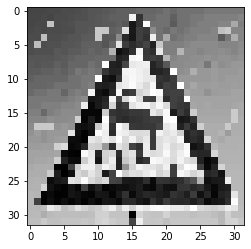

In [0]:
slippery_road = np.asarray(slippery_road)
slippery_road = cv2.resize(slippery_road, (32, 32))
slippery_road = preprocess_image(slippery_road)
plt.imshow(slippery_road, cmap = plt.get_cmap('gray'))
slippery_road = slippery_road.reshape(1, 32, 32, 1)

In [0]:
print("predict: "+ str(model.predict_classes(slippery_road)))

predict: [23]


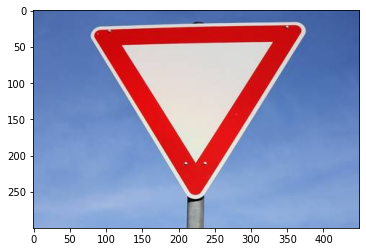

In [0]:
#CLASS 13
yield_sign = cv2.imread('yield(13).jpg')
yield_sign = cv2.cvtColor(yield_sign, cv2.COLOR_BGR2RGB)
plt.imshow(yield_sign)

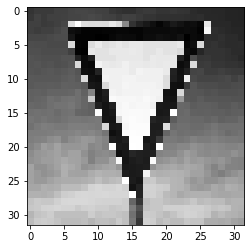

In [0]:
yield_sign = np.asarray(yield_sign)
yield_sign = cv2.resize(yield_sign, (32, 32))
yield_sign = preprocess_image(yield_sign)
plt.imshow(yield_sign, cmap = plt.get_cmap('gray'))
yield_sign = yield_sign.reshape(1, 32, 32, 1)

In [0]:
print("predict: "+ str(model.predict_classes(yield_sign)))

predict: [13]


In [0]:
# save the model

model.save('model.h5')